In [1]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set(color_codes=True)
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
#Generating normally distributed data

df = pd.DataFrame({
    'x1': np.random.normal(0, 2, 10000),
    'x2': np.random.normal(5, 3, 10000),
    'x3': np.random.normal(-5, 5, 10000)
})

In [3]:
df.head()

x1        x2         x3
0 -0.033470  7.815852 -12.533301
1  0.436384  6.284146  -3.227832
2  1.058096  3.430952   0.190958
3 -0.044450  6.090277  -8.326755
4  1.813563  8.621639  -4.519463

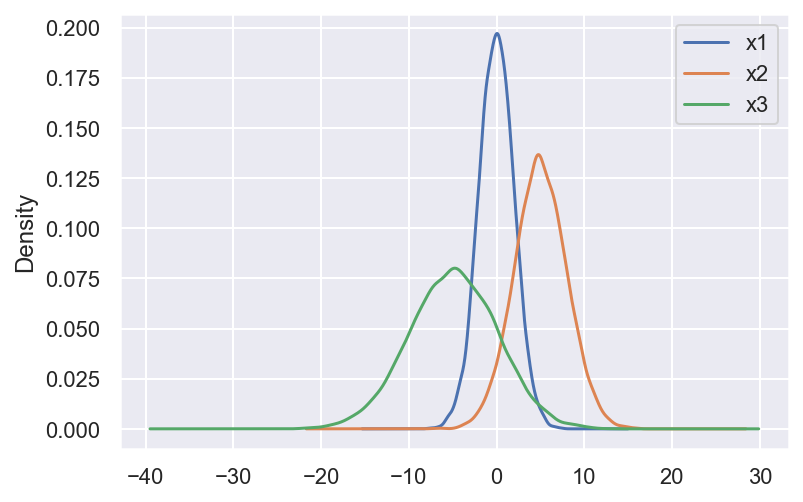

In [4]:
# plotting data

df.plot.kde()  # Generate Kernel Density Estimate plot using Gaussian kernels.

In [5]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
data_tf = ss.fit_transform(df)     # returns an array
df = pd.DataFrame(data_tf, columns=['x1','x2','x3'])

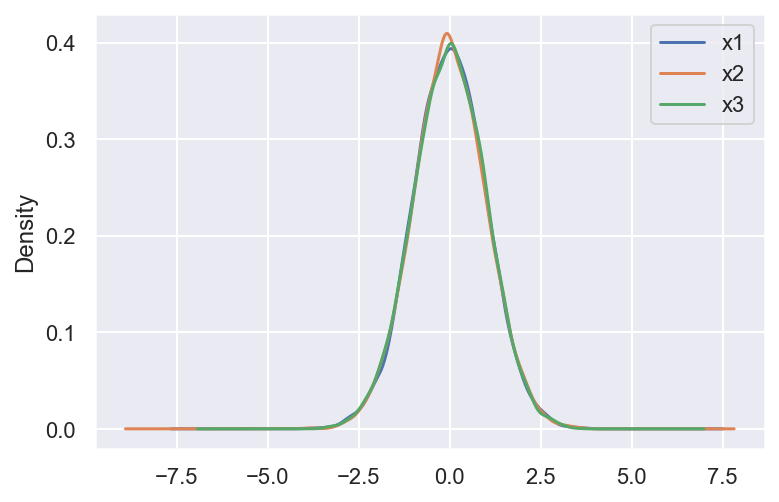

In [6]:
df.plot.kde()

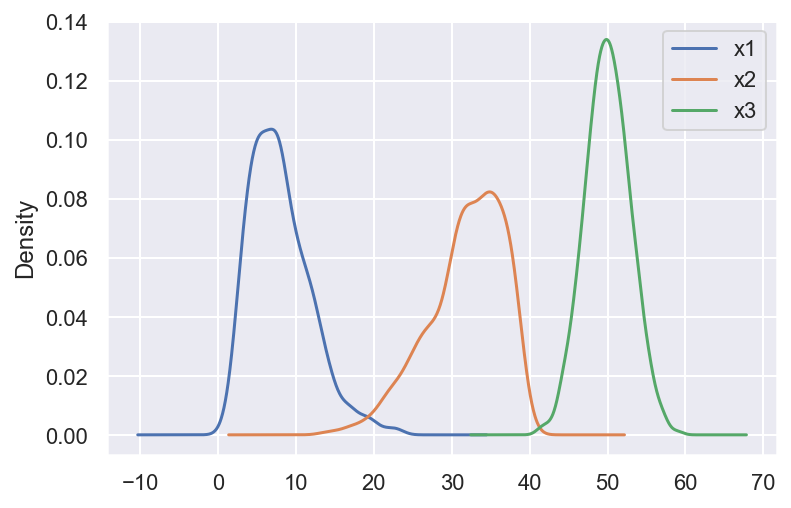

In [7]:
df = pd.DataFrame({
    # positive skew
    'x1': np.random.chisquare(8, 1000),
    # negative skew 
    'x2': np.random.beta(8, 2, 1000) * 40,
    # no skew
    'x3': np.random.normal(50, 3, 1000)
})

df.plot.kde()

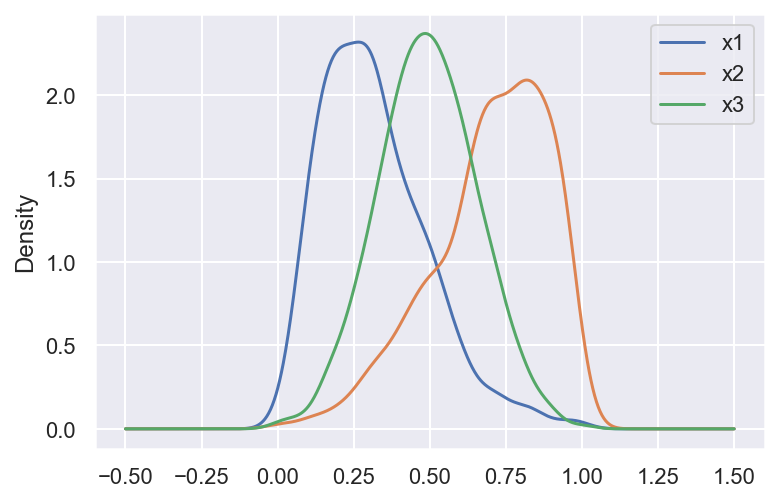

In [8]:
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()
data_tf = minmax.fit_transform(df)

df = pd.DataFrame(data_tf,columns=['x1','x2','x3'])
df.plot.kde()

In [9]:
df.x2.max()

0.9999999999999998

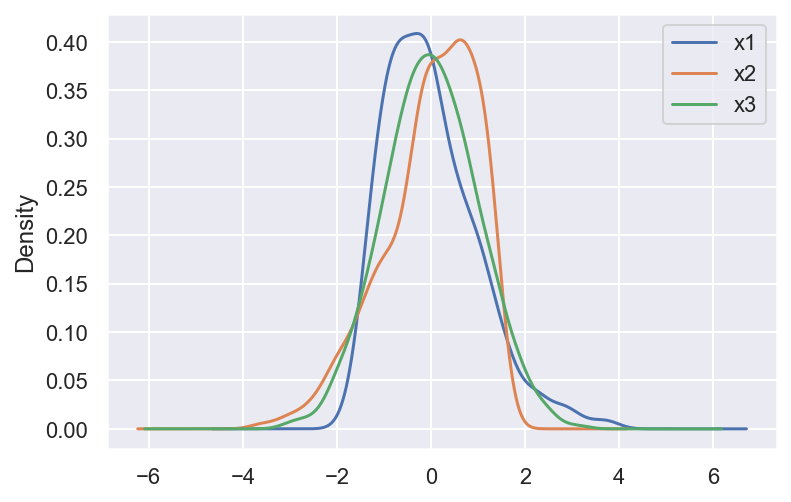

In [10]:
standardscaler = StandardScaler()
data_tf = standardscaler.fit_transform(df)

df = pd.DataFrame(data_tf,columns=['x1','x2','x3'])
df.plot.kde()

In [11]:
df = pd.DataFrame({
    # Distribution with lower outliers
    'x1': np.concatenate([np.random.normal(20, 1, 1000), np.random.normal(1, 1, 25)]),
    # Distribution with higher outliers
    'x2': np.concatenate([np.random.normal(30, 1, 1000), np.random.normal(50, 1, 25)]),
})

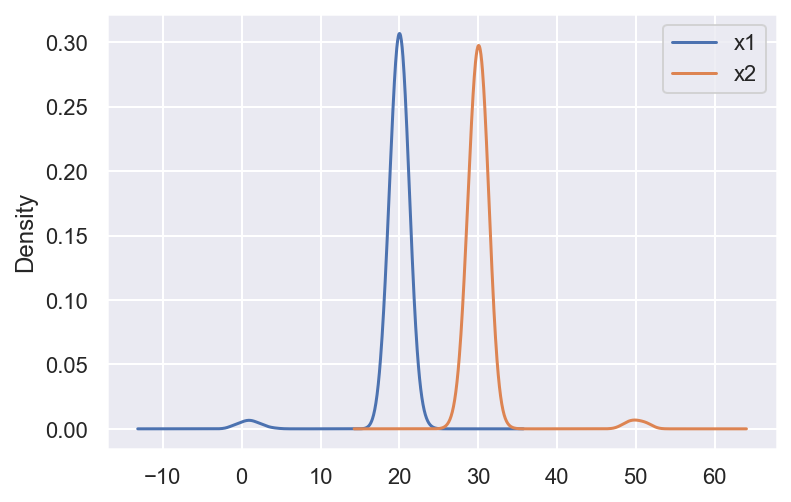

In [12]:
df.plot.kde()

### Robust scaler
- Scale features using statistics that are robust to outliers.
- This Scaler removes the median and scales the data according to the quartile range
  (defaults to IQR: Interquartile Range).
- Centering and scaling happen independently on each feature by computing the 
  relevant statistics on the samples in the training set. Median and interquartile 
  range are then stored to be used on later data using the transform method.

### Scaling
- standard scaling: "이상치, 특이값 (outlier)이 없어야 한다"는 가정사항이 있습니다.  
  표준정규분포로 변환하는 공식이 z = (x - mean) / std  이며, 평균(mean)은 이상치, 
  특이값에 엄청 민감하기 때문. 그럼, 데이터에 "이상치"가 포함되어 있다면?
- 첫번째 방법은 "이상치, 특이값을 찾아서 제거"한 후 표준정규분포로 표준화 변환을 해서
  분석, 모델링을 진행하는 방법입니다. 
  "이상치, 특이값을 찾아서 제거"하는 노~력이 필요합니다. 
  물론, 회귀분석과 같은 parametric modeling 에서는 이상치 제거 후 모델링이 적합.
- 두번째 방법은 "이상치, 특이값에 덜 민감한" 중앙값(median)과 IQR(Inter-Quartile Range)을 
  이용해서 척도를 표준화하는 방법입니다. K-NN 같은 non-parametric modeling 은 두번째 
  방법도 써볼만 함.
- 결론적으로,
  (1) StandardScaler() method를 이용한 표준정규분포로의 표준화 ((x-mean)/std )와
  (2) RobustScaler() method를 이용한 표준화 ( (x-median)/IQR )를

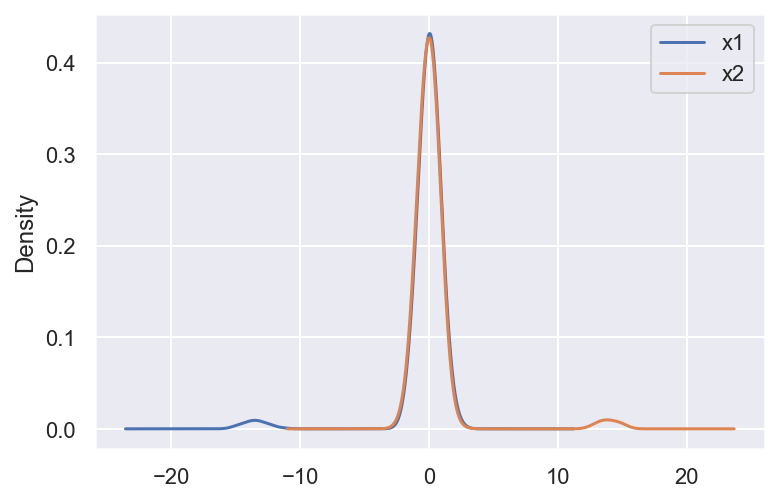

In [13]:
from sklearn.preprocessing import RobustScaler
robustscaler = RobustScaler()

data_tf = robustscaler.fit_transform(df)
df = pd.DataFrame(data_tf, columns=['x1','x2'])
df.plot.kde()

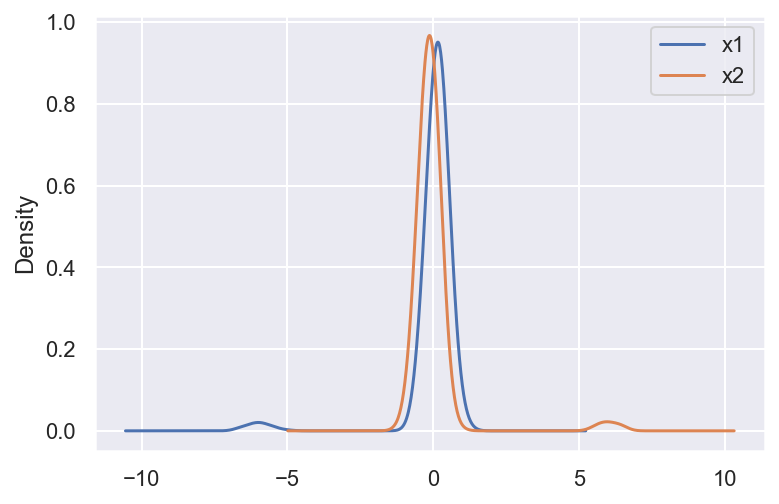

In [14]:
from sklearn.preprocessing import StandardScaler
standardscaler = StandardScaler()

data_tf = standardscaler.fit_transform(df)
df = pd.DataFrame(data_tf, columns=['x1','x2'])
df.plot.kde()

## 7. Encoding Categorical Values 
#### Encoding Ordinal Values
* Ordinal Values - Low, Medium & High. Relationship between values
* LabelEncoding with right mapping

In [15]:
df = pd.DataFrame({
    'Age':[33,44,22,44,55,22],
    'Income':['Low','Low','High','Medium','Medium','High']})

In [16]:
df

Age  Income
0   33     Low
1   44     Low
2   22    High
3   44  Medium
4   55  Medium
5   22    High

In [17]:
df.Income.map({'Low':1,'Medium':2,'High':3})

0    1
1    1
2    3
3    2
4    2
5    3
Name: Income, dtype: int64

#### Encoding Nominal Values
* Nominal Values - Male, Female. No relationship between data
* One Hot Encoding for converting data into one-hot vector

In [18]:
df = pd.DataFrame({
    'Age':[33,44,22,44,55,22],
    'Gender':['Male','Female','Male','Female','Male','Male']})

In [19]:
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [20]:
df

Age  Gender
0   33    Male
1   44  Female
2   22    Male
3   44  Female
4   55    Male
5   22    Male

In [21]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

le = LabelEncoder()   # encode labels with values between 0 and (no. of class -1)
df['gender_tf'] = le.fit_transform(df.Gender)

In [22]:
df

Age  Gender  gender_tf
0   33    Male          1
1   44  Female          0
2   22    Male          1
3   44  Female          0
4   55    Male          1
5   22    Male          1

In [23]:
OneHotEncoder().fit_transform(df[['Gender']]).toarray()

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [24]:
# same as the above
OneHotEncoder().fit_transform(df[['gender_tf']]).toarray()

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.]])

## 11. Text Processing
* Perhaps one of the most common information
* Learning algorithms don't understand text but only numbers
* Below menthods convert text to numbers

## 12. CountVectorizer
* Each column represents one word, count refers to frequency of the word
* Sequence of words are not maintained

#### Hyperparameters
* n_grams - Number of words considered for each column
* stop_words - words not considered
* vocabulary - only words considered


In [25]:
corpus = [
     'This is the first document awesome food.',
     'This is the second second document.',
     'And the third one the is mission impossible.',
     'Is this the first document?',
]
df = pd.DataFrame({'Text':corpus})
df

Text
0      This is the first document awesome food.
1           This is the second second document.
2  And the third one the is mission impossible.
3                   Is this the first document?

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [27]:
cv.fit_transform(df.Text)

<4x13 sparse matrix of type '<class 'numpy.int64'>'
	with 24 stored elements in Compressed Sparse Row format>

In [28]:
cv.fit_transform(df.Text).toarray()

array([[0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1],
       [0, 0, 1, 0, 0, 0, 1, 0, 0, 2, 1, 0, 1],
       [1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 2, 1, 0],
       [0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1]], dtype=int64)

In [29]:
cv.get_feature_names()

['and',
 'awesome',
 'document',
 'first',
 'food',
 'impossible',
 'is',
 'mission',
 'one',
 'second',
 'the',
 'third',
 'this']

In [30]:
cv.vocabulary_

{'this': 12,
 'is': 6,
 'the': 10,
 'first': 3,
 'document': 2,
 'awesome': 1,
 'food': 4,
 'second': 9,
 'and': 0,
 'third': 11,
 'one': 8,
 'mission': 7,
 'impossible': 5}

In [31]:
# help(cv)

In [32]:
cv = CountVectorizer(stop_words=['the','is'])
cv.fit_transform(df.Text).toarray()

array([[0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 1],
       [1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1]], dtype=int64)

In [33]:
cv.vocabulary_

{'this': 10,
 'first': 3,
 'document': 2,
 'awesome': 1,
 'food': 4,
 'second': 8,
 'and': 0,
 'third': 9,
 'one': 7,
 'mission': 6,
 'impossible': 5}

In [34]:
cv = CountVectorizer(vocabulary=['mission','food','second'])
cv.fit_transform(df.Text).toarray()
cv.vocabulary_

{'mission': 0, 'food': 1, 'second': 2}

In [35]:
cv = CountVectorizer(ngram_range=[1,2])  
# ngram_range: the lower and upper boundary of the range
cv.fit_transform(df.Text).toarray()

array([[0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 1, 1, 1,
        0, 0, 1, 0, 0, 0, 1, 1, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 2,
        0, 1, 0, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 0, 1, 0, 1]], dtype=int64)

In [40]:
cv.vocabulary_, len(cv.vocabulary_)

({'this': 28,
  'is': 10,
  'the': 21,
  'first': 6,
  'document': 4,
  'awesome': 2,
  'food': 8,
  'this is': 29,
  'is the': 12,
  'the first': 22,
  'first document': 7,
  'document awesome': 5,
  'awesome food': 3,
  'second': 18,
  'the second': 24,
  'second second': 20,
  'second document': 19,
  'and': 0,
  'third': 26,
  'one': 16,
  'mission': 14,
  'impossible': 9,
  'and the': 1,
  'the third': 25,
  'third one': 27,
  'one the': 17,
  'the is': 23,
  'is mission': 11,
  'mission impossible': 15,
  'is this': 13,
  'this the': 30},
 31)

In [41]:
cv = CountVectorizer(ngram_range=[1,2], stop_words='english')  
# stop_words: Stop Words 는 문서에서 단어장을 생성할 때 무시할 수 있는 단어를 말한다.
# 보통 영어의 관사나 접속사, 한국어의 조사 등이 여기에 해당한다.
cv.fit_transform(df.Text).toarray()

array([[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 2, 1, 1],
       [0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

In [42]:
cv.vocabulary_

{'document': 2,
 'awesome': 0,
 'food': 4,
 'document awesome': 3,
 'awesome food': 1,
 'second': 8,
 'second second': 10,
 'second document': 9,
 'mission': 6,
 'impossible': 5,
 'mission impossible': 7}

## 13. TfIdfVectorizer
* Words occuring more frequently in a doc versus entire corpus is considered more important
* The importance is in scale of 0 & 1

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer1 = CountVectorizer(stop_words='english')
vectorizer2 = TfidfVectorizer(stop_words='english') 
# a built-in stop word list for English is used.

In [50]:
vectorizer1.fit_transform(df.Text).toarray().round(2)

array([[1, 1, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 2],
       [0, 0, 0, 1, 1, 0],
       [0, 1, 0, 0, 0, 0]], dtype=int64)

In [49]:
vectorizer2.fit_transform(df.Text).toarray().round(2)

array([[0.64, 0.41, 0.64, 0.  , 0.  , 0.  ],
       [0.  , 0.3 , 0.  , 0.  , 0.  , 0.95],
       [0.  , 0.  , 0.  , 0.71, 0.71, 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  ]])

In [51]:
vectorizer1.get_feature_names()

['awesome', 'document', 'food', 'impossible', 'mission', 'second']

In [52]:
vectorizer2.get_feature_names()

['awesome', 'document', 'food', 'impossible', 'mission', 'second']

In [53]:
vectorizer2.vocabulary_

{'document': 1,
 'awesome': 0,
 'food': 2,
 'second': 5,
 'mission': 4,
 'impossible': 3}